**Imports**

In [20]:
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

In [21]:
data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/final_features.csv'
data_df = pd.read_csv(data_url, sep = ',', engine = 'python', encoding = 'latin-1')

**Plotting ROC Curves of our Highest Scoring Models**

In [22]:
#Set X and y

X = data_df.loc[:,['trackType', 'alt_trans', 'grid', 'normalized_minLapTime', 'normalized_avgLapTime', 'year', 'PRCP_trans', 
'TAVG', 'isHistoric', "oneHot_circuits_1", "oneHot_circuits_2", "oneHot_circuits_3",
"oneHot_circuits_4","oneHot_circuits_5","oneHot_circuits_6"]]

y = data_df["CompletionStatus"]

In [23]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state = 3)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_resampled, y_resampled)

LogisticRegression()

In [26]:
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(cv=3)
logregcv.fit(X_resampled, y_resampled)

LogisticRegressionCV(cv=3)

In [27]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_resampled, y_resampled)

LinearSVC()

In [28]:
from sklearn.svm import NuSVC
nsvc = NuSVC(gamma='auto')
nsvc.fit(X_resampled, y_resampled)

NuSVC(gamma='auto')

In [29]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_resampled, y_resampled)

SVC(gamma='auto')

In [31]:
from sklearn.metrics import plot_roc_curve

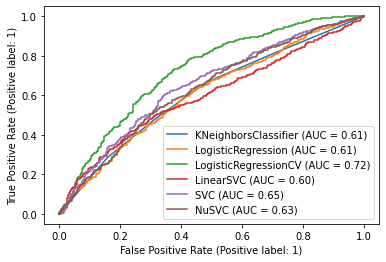

In [32]:
disp = plot_roc_curve(kn, X_test, y_test)
plot_roc_curve(logreg, X_test, y_test, ax=disp.ax_);
plot_roc_curve(logregcv, X_test, y_test, ax=disp.ax_);
plot_roc_curve(lsvc, X_test, y_test, ax=disp.ax_);
plot_roc_curve(svc, X_test, y_test, ax=disp.ax_);
plot_roc_curve(nsvc, X_test, y_test, ax=disp.ax_)

**Plotting the Confusion Matrices of our Highest Scoring Models**

In [33]:
from sklearn.metrics import plot_confusion_matrix

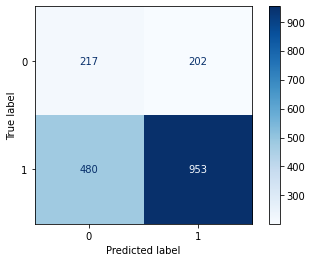

In [34]:
#KNeighbors Classifier
disp = plot_confusion_matrix(kn, X_test, y_test, cmap='Blues', values_format='d')

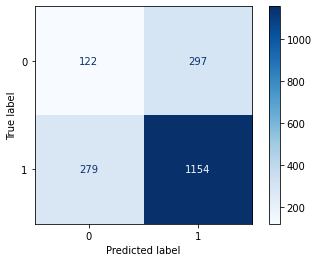

In [35]:
#Logistic Regression
disp = plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d')

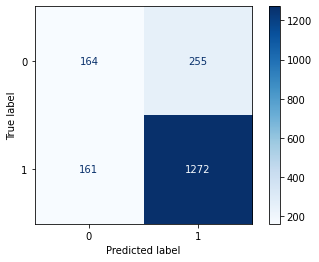

In [36]:
#Logistic RegressionCV
disp = plot_confusion_matrix(logregcv, X_test, y_test, cmap='Blues', values_format='d')

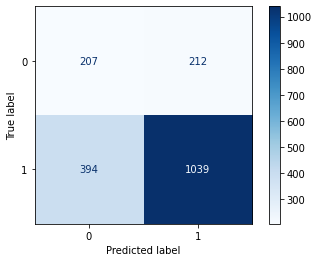

In [37]:
#SVC
disp = plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format='d')

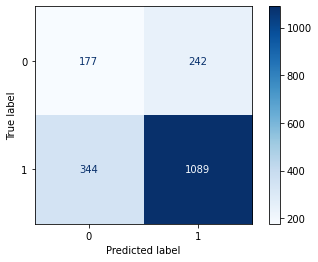

In [38]:
#NuSVC
disp = plot_confusion_matrix(nsvc, X_test, y_test, cmap='Blues', values_format='d')

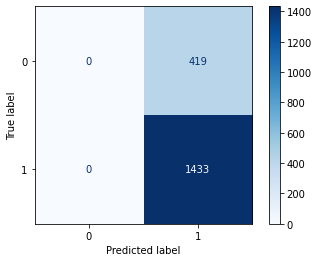

In [39]:
#LinearSVC
disp = plot_confusion_matrix(lsvc, X_test, y_test, cmap='Blues', values_format='d')